In [13]:
# # This line imports the NumPy package
import numpy as np

# Introduction

**Pandas** is desgined to make data pre-processing and data analysis fast and easy in Python. Pandas adopts many coding idioms from NumPy, such as avoiding the `for` loops, but pandas is designed for working with heterogenous data represented in tabular format.

To use Pandas, you need to import the `pandas` module, using for example:

In [1]:
import pandas as pd

This import style is quite standard; all objects and functions the `pandas` package will now be invoked with the `pd.` prefix.

# Series

Pandas has two main data structures, **Series** and **DataFrame**. Series are a the Pandas version of 1-D Numpy arrays. A Series is a single dimension array-like object containing a *sequence of values*, with an array of *data labels*, called its **index**.
A Series can be created easily from a Python list:

In [38]:
ts = pd.Series([4, 8, 1, 3])
print(ts)

0    4
1    8
2    1
3    3
dtype: int64


The underlying structure can be recovered with the `values` attribute:

In [39]:
print(ts.values)

[4 8 1 3]


The string representation of a Series display two columns: the first column represents the index array, the second column represents the values array. Since no index was specified, the default indexing consists of increasing integers starting from 0. To create a Series with its own index, you can write:

In [7]:
ts = pd.Series([4, 8, 1, 3], index=['first', 'second', 'third', 'fourth'])
print(ts)

first     4
second    8
third     1
fourth    3
dtype: int64


The labels in the index can be used to select values in the Series (note the list in the second line):

In [11]:
print(ts['first'])
print(ts[['second', 'fourth']])

4
second    8
fourth    3
dtype: int64


Using NumPy functions or NumPy-like operations, such as boolean indexing, universal functions, and so on, will preserve the indexes:

In [14]:
print(ts[ts > 3])
print(np.exp(ts))

first     4
second    8
dtype: int64
first       54.598150
second    2980.957987
third        2.718282
fourth      20.085537
dtype: float64


You can think about a Series as a kind of fixed-length, ordered Python's `dict`, mapping index values to data values. In fact, it is possible to create a Series directlty from a Python's `dict`:

In [15]:
my_dict = {'Pisa': 80, 'London': 300, 'Paris': 1}
ts = pd.Series(my_dict)
print(ts)

Pisa       80
London    300
Paris       1
dtype: int64


Arithmetic operations on Series are automatically aligned on the index labels:

In [19]:
ts1 = pd.Series([4, 8, 1, 3], index=['first', 'second', 'third', 'fourth'])
ts2 = pd.Series([4, 8, 1], index=['first', 'second', 'pisa'])
ts_sum = ts1 + ts2
print(ts_sum)

first      8.0
fourth     NaN
pisa       NaN
second    16.0
third      NaN
dtype: float64


Here two index values are correctly computed (corresponding to the label `first` and `second`). The two other index labels `third` and `fourth` in `ts1` are missing in `ts2`, as well as the `pisa` index label in `ts2`. Hence, for each of these index label, a `NaN` value (*not a number*) appears, which Pnadas considers as a **missing value**.

The `pd.isnull` and `pd.notnull` functions detects missing data, as well as the corresponding instance methods:

In [21]:
print(pd.isnull(ts_sum))
print(ts_sum.notnull())

first     False
fourth     True
pisa       True
second    False
third      True
dtype: bool
first      True
fourth    False
pisa      False
second     True
third     False
dtype: bool


Both Series and its index have a `name` attribute:

In [22]:
ts_sum.name = 'sum'
ts_sum.index.name = 'new name'
print(ts_sum)

new name
first      8.0
fourth     NaN
pisa       NaN
second    16.0
third      NaN
Name: sum, dtype: float64


# DataFrame

A DataFrame is a rectangular table of data. It contains an ordered list of columns. Every column can be of a different value type. A dataFrame has both a *row index* and a *column index*. It can be thought as a dict of Series (one per column) all sharing the same index labels.

There are many way to construct a DataFrame, but the most common is using a dictionary of equally-sized Python's lists (or NumPy's arrays):

In [30]:
cars = {'Brand': ['Honda Civic', 'Toyota Corolla', 'Ford Focus', 'Audi A4'],
        'Price': [22000, 25000, 27000, 35000]}

df = pd.DataFrame(cars)
print(df)

            Brand  Price
0     Honda Civic  22000
1  Toyota Corolla  25000
2      Ford Focus  27000
3         Audi A4  35000


The resulting DataFrame will received its index automatically as with Series.

To pretty-print a DataFrame in a Jupyter notebooks, it is enough to write its name (or using the `head()` instance method for very long DataFrames):

In [32]:
df.head()

,Brand,Price
0,Honda Civic,22000
1,Toyota Corolla,25000
2,Ford Focus,27000
3,Audi A4,35000


It is possible to change the order of the colums at DataFrame construction time. If you provide a column's name not included in the dictionary, a column with missing values will appear:

In [35]:
df = pd.DataFrame(cars, columns=['Color', 'Price', 'Brand'])
print(df)

  Color  Price           Brand
0   NaN  22000     Honda Civic
1   NaN  25000  Toyota Corolla
2   NaN  27000      Ford Focus
3   NaN  35000         Audi A4


If working with a large table, it might be useful to sometimes have a list of all the columns' names. This is given by the `keys()` methods:

In [47]:
print(df.keys())

Index(['Color', 'Price', 'Brand'], dtype='object')


Many feature from the NumPy package can be directly used with Pandas DataFrames

In [113]:
print(df.values)

[['Mahler' 1860 1911 'Kaliste' 51]
 ['Beethoven' 1770 1827 'Bonn' 57]
 ['Puccini' 1858 1924 'Lucques' 66]
 ['Shostakovich' 1906 1975 'Saint-Petersburg' 69]]


In [114]:
print(df.shape)

(4, 5)


Another common way to create a DataFrame is to use a *nested dict of dicts*:

In [58]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

If this nested dict is passed to the DataFrame, the outer dict keys are interpreted as column labels, and the inner keys are interpreted as row labels:

In [59]:
df = pd.DataFrame(pop)
df

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


## Accessing a DataFrame

We now create a more complex DataFrame:

In [40]:
dict_of_list = {'birth': [1860, 1770, 1858, 1906], 
                'death':[1911, 1827, 1924, 1975], 
                'city':['Kaliste', 'Bonn', 'Lucques', 'Saint-Petersburg']}
composers_df = pd.DataFrame(dict_of_list, index=['Mahler', 'Beethoven', 'Puccini', 'Shostakovich'])
composers_df

,birth,death,city
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg


There are multiple ways of accessing values or series of values in a Dataframe. Unlike in Series, a simple bracket gives access to a column and not an index, for example:

In [42]:
composers_df['city']

Mahler                   Kaliste
Beethoven                   Bonn
Puccini                  Lucques
Shostakovich    Saint-Petersburg
Name: city, dtype: object

returns a Series. Alternatively one can also use the attributes syntax and access columns by using:

In [43]:
composers_df.city

Mahler                   Kaliste
Beethoven                   Bonn
Puccini                  Lucques
Shostakovich    Saint-Petersburg
Name: city, dtype: object

The attributes syntax has some limitations, so in case something does not work as expected, revert to the brackets notation.

When specifiying multiple columns, a DataFrame is returned:

In [44]:
composers_df[['city', 'birth']]

,city,birth
Mahler,Kaliste,1860
Beethoven,Bonn,1770
Puccini,Lucques,1858
Shostakovich,Saint-Petersburg,1906


One of the important differences with a regular Numpy array is that **with Pandas' DataFrame regular indexing doesn't work**. Instead one has to use either the `iloc` or the `loc` attributes.

**Remember that `loc` and `iloc` are attributes, not methods, hence they use brackets `[]` and not parenthesis `()`.**

The `loc` attribute allows to recover elements by using the index labels, while the `iloc` attribute can be used to recover the regular indexing:

In [46]:
print(composers_df.iloc[0,1])
print(composers_df.loc['Mahler', 'death'])

1911
1911


## Adding columns

It is very simple to add a column to a Dataframe:

In [54]:
composers_df['country'] = '???'
composers_df

,birth,death,city,country2,country
Mahler,1860,1911,Kaliste,Austria,???
Beethoven,1770,1827,Bonn,Germany,???
Puccini,1858,1924,Lucques,Italy,???
Shostakovich,1906,1975,Saint-Petersburg,Russia,???


Alternatively, an existing list can be used:

In [55]:
composers_df['country2'] = ['Austria','Germany','Italy','Russia']
composers_df

,birth,death,city,country2,country
Mahler,1860,1911,Kaliste,Austria,???
Beethoven,1770,1827,Bonn,Germany,???
Puccini,1858,1924,Lucques,Italy,???
Shostakovich,1906,1975,Saint-Petersburg,Russia,???


## Deleting columns

The `del`keyword is used to delete columns:

In [56]:
del composers_df['country']
composers_df

,birth,death,city,country2
Mahler,1860,1911,Kaliste,Austria
Beethoven,1770,1827,Bonn,Germany
Puccini,1858,1924,Lucques,Italy
Shostakovich,1906,1975,Saint-Petersburg,Russia


# Importing Excel files as DataFrames

Another very common way of "creating" a Pandas Dataframe is by importing a table from another format like CSV or Excel. In order to import Excel files, you need to install the `xlrd` package:

```shell
> pip install xlrd
```

An Excel table is provided in the [composers.xlsx](data/composers.xlsx) file and can be read with the `pd.read_excel` function. There are many more readers for other types of data (csv, json, html etc.) but we focus here on Excel.

In [63]:
composers_df = pd.read_excel('data/composers.xlsx')
composers_df

,composer,birth,death,city
0,Mahler,1860,1911,Kaliste
1,Beethoven,1770,1827,Bonn
2,Puccini,1858,1924,Lucques
3,Shostakovich,1906,1975,Saint-Petersburg


The reader automatically recognized the heaers of the file. However it created a new index. If needed we can specify which column to use as header:

In [64]:
composers_df = pd.read_excel('data/composers.xlsx', index_col = 'composer')
composers_df

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg


If we open the file in Excel, we see that it is composed of more than one sheet. Clearly, when not specifying anything, the reader only reads the first sheet. However we can specify a sheet:

In [68]:
composers_df = pd.read_excel('data/composers.xlsx', index_col = 'composer', sheet_name='Sheet2')
composers_df

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg
Sibelius,unknown,unknown,unknown
Haydn,NaN,NaN,Rohrau


As you can see above, some information is missing. Some missing values are marked as "`unknown`" while other are `NaN`. `NaN` is the standard symbol for unknown/missing values and is understood by Pandas while "`unknown`" is just seen as text. 
This is impractical as now we have columns with a mix of numbers and text which will make later computations difficult. What we would like to do is to replace all "irrelevant" values with the standard `NaN` symbol that says "*no information*".
For this we can use the `na_values` argument to specify what should be a `NaN`:

In [81]:
composers_df = pd.read_excel('data/composers.xlsx', index_col = 'composer', sheet_name='Sheet2', 
                             na_values=['unknown'])
composers_df

,birth,death,city
composer,,,
Mahler,1860.0,1911.0,Kaliste
Beethoven,1770.0,1827.0,Bonn
Puccini,1858.0,1924.0,Lucques
Shostakovich,1906.0,1975.0,Saint-Petersburg
Sibelius,NaN,NaN,NaN
Haydn,NaN,NaN,Rohrau


# Plotting DataFrames

We will learn more about plotting later, but let's see here some possibilities offered by Pandas. Pandas builds on top of Matplotlib but exploits the knowledge included in Dataframes to improve the default output. 

We can pass Series to Matplotlib which manages to understand them. Here's a default scatter plot:

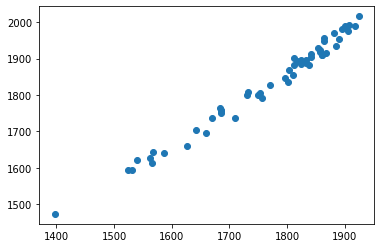

In [84]:
import matplotlib.pyplot as plt

composers_df = pd.read_excel('data/composers.xlsx', index_col = 'composer', sheet_name='Sheet5')
plt.plot(composers_df.birth, composers_df.death, 'o')
plt.show()

Different types of plots are accessible when using the `plot` function of DataFrame instances via the `kind` option. The variables to plot are column names passed as keywords instead of whole series like in Matplotlib:

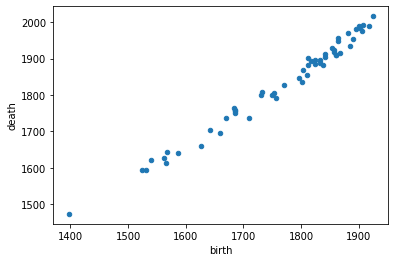

In [85]:
composers_df.plot(x = 'birth', y = 'death', kind = 'scatter')
plt.show()

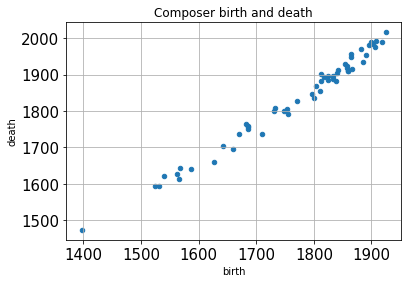

In [86]:
composers_df.plot(x = 'birth', y = 'death', kind = 'scatter',
                  title = 'Composer birth and death', grid = True, fontsize = 15)
plt.show()

Some additional plotting options are available in the plot() module. For example histograms:

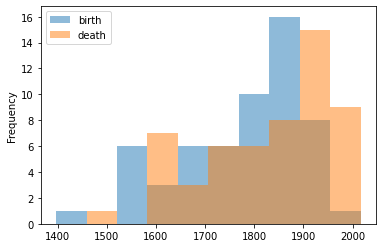

In [87]:
composers_df.plot.hist(alpha = 0.5)
plt.show()

Here you see again the gain from using Pandas: without specifying anything, Pandas made a histogram of the two columns containing numbers, labelled the axis and even added a legend to the plot.

# DataFrame Operations

One of the great advantages of using Pandas to handle tabular data is how simple it is to extract valuable information from them. Here we are going to see various types of operations that are available for this.

## Matrix operations

The strength of Numpy is its natural way of handling matrix operations, and Pandas reuses a lot of these features. For example one can use simple mathematical operations to opereate at the cell level:

In [88]:
df = pd.read_excel('data/composers.xlsx')
df

,composer,birth,death,city
0,Mahler,1860,1911,Kaliste
1,Beethoven,1770,1827,Bonn
2,Puccini,1858,1924,Lucques
3,Shostakovich,1906,1975,Saint-Petersburg


In [89]:
df['birth'] * 2

0    3720
1    3540
2    3716
3    3812
Name: birth, dtype: int64

In [90]:
np.log(df['birth'])

0    7.528332
1    7.478735
2    7.527256
3    7.552762
Name: birth, dtype: float64

We can directly use an operation's output to create a new column:

In [99]:
df['age'] = df['death'] - df['birth']
df

,composer,birth,death,city,age
0,Mahler,1860,1911,Kaliste,51
1,Beethoven,1770,1827,Bonn,57
2,Puccini,1858,1924,Lucques,66
3,Shostakovich,1906,1975,Saint-Petersburg,69


Here we applied functions only to series. Indeed, since our Dataframe contains e.g. strings, no operation can be done on it. If however we have a homogenous Dataframe, this is possible:

In [91]:
df[['birth', 'death']] * 2

,birth,death
0,3720,3822
1,3540,3654
2,3716,3848
3,3812,3950


## Column operations

There are other types of functions whose purpose is to summarize the data. For example the mean or standard deviation. Pandas by default applies such functions column-wise and returns a series containing e.g. the mean of each column:

In [92]:
np.mean(df)

birth    1848.50
death    1909.25
dtype: float64

Note that columns for which a mean does not make sense, like the city are discarded. 

Sometimes one needs to apply to a column a very specific function that is not provided by default. In that case we can use one of the different `apply` methods of Pandas.

The simplest case is to apply a function to a column, or Series of a DataFrame. Let's say for example that we want to define the the age >60 as 'old' and <60 as 'young'. We can define the following general function:

In [94]:
define_age = lambda x: 'old' if x > 60 else 'young'

We can now apply this function on an entire Series:

In [100]:
df.age.apply(define_age)

0    young
1    young
2      old
3      old
Name: age, dtype: object

We can also apply a function to an entire DataFrame. For example we can ask how many composers have birth and death dates within the XIXth century:

In [102]:
nineteen_century_count = lambda x: np.sum( (x >= 1800) & (x < 1900) )
df[['birth','death']].apply(nineteen_century_count)

birth    2
death    1
dtype: int64

## Boolean Indexing

Just like with Numpy, it is possible to subselect parts of a Dataframe using boolean indexing.

In [105]:
mask = df['birth'] > 1859
print(mask)

0     True
1    False
2    False
3     True
Name: birth, dtype: bool


Just like in Numpy we can use this logical Series as an index to select elements in the Dataframe.

In [106]:
df[mask]

,composer,birth,death,city,age
0,Mahler,1860,1911,Kaliste,51
3,Shostakovich,1906,1975,Saint-Petersburg,69


# Data Merging

Often information is comming from different sources and it is necessary to combine it into one object. We are going to see the different ways in which information contained within separate Dataframes can be combined in a meaningful way.

## Concatenation

The simplest way we can combine two Dataframes is simply to "paste" them together:

In [124]:
composers1 = pd.read_excel('data/composers.xlsx', index_col='composer',sheet_name='Sheet1')
composers1

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg


In [125]:
composers2 = pd.read_excel('data/composers.xlsx', index_col='composer',sheet_name='Sheet3')
composers2

,birth,death,city
composer,,,
Verdi,1813,1901,Roncole
Dvorak,1841,1904,Nelahozeves
Schumann,1810,1856,Zwickau
Stravinsky,1882,1971,Oranienbaum
Mahler,1860,1911,Kaliste


To be concatenated, Dataframes need to be provided as a list to the `pd.concat` method:

In [126]:
all_composers = pd.concat([composers1,composers2])
all_composers

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg
Verdi,1813,1901,Roncole
Dvorak,1841,1904,Nelahozeves
Schumann,1810,1856,Zwickau
Stravinsky,1882,1971,Oranienbaum
Mahler,1860,1911,Kaliste


One potential problem is that two tables contain duplicated information:

In [127]:
all_composers.loc['Mahler']

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Mahler,1860,1911,Kaliste


It is very easy to get rid of it using:

In [128]:
all_composers.drop_duplicates()

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg
Verdi,1813,1901,Roncole
Dvorak,1841,1904,Nelahozeves
Schumann,1810,1856,Zwickau
Stravinsky,1882,1971,Oranienbaum


## Joining

An other classical case is that of two list with similar index but containing different information:

In [129]:
composers1 = pd.read_excel('data/composers.xlsx', index_col='composer',sheet_name='Sheet1')
composers1

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg


In [130]:
composers2 = pd.read_excel('data/composers.xlsx', index_col='composer',sheet_name='Sheet4')
composers2

,first name
composer,
Mahler,Gustav
Beethoven,Ludwig van
Puccini,Giacomo
Brahms,Johannes


If we use simple concatenation, this doesn't help us much. We just end up with a large matrix with lots of `NaN`'s:


In [131]:
pd.concat([composers1, composers2])

,birth,death,city,first name
composer,,,,
Mahler,1860.0,1911.0,Kaliste,NaN
Beethoven,1770.0,1827.0,Bonn,NaN
Puccini,1858.0,1924.0,Lucques,NaN
Shostakovich,1906.0,1975.0,Saint-Petersburg,NaN
Mahler,NaN,NaN,NaN,Gustav
Beethoven,NaN,NaN,NaN,Ludwig van
Puccini,NaN,NaN,NaN,Giacomo
Brahms,NaN,NaN,NaN,Johannes


The better way of doing this is to **join** the tables. This is a classical database concept avaialble in Pandas. `join()` operates on two tables: the first one is the "left" table which uses `join()` as a method. The other table is the "right" one.
Let's try the default join settings:

In [132]:
composers1.join(composers2)

,birth,death,city,first name
composer,,,,
Mahler,1860,1911,Kaliste,Gustav
Beethoven,1770,1827,Bonn,Ludwig van
Puccini,1858,1924,Lucques,Giacomo
Shostakovich,1906,1975,Saint-Petersburg,NaN


We see that Pandas was smart enough to notice that the two tables had a index name and used it to combine the tables. We also see that one element from the second table (Brahms) is missing. The reason for this is the way indices not present in both tables are handled. There are four ways of doing this with two tables called here the "left" and "right" table.

### Join left

The two Dataframes that should be merged have a common index, but not necessarily the same items. For example here Shostakovich is missing in the second table, while Brahms is missing in the first one.

When using the "left" join, we use the first Dataframe as basis and only use the indices that appear there.

In [133]:
composers1.join(composers2, how = 'left')

,birth,death,city,first name
composer,,,,
Mahler,1860,1911,Kaliste,Gustav
Beethoven,1770,1827,Bonn,Ludwig van
Puccini,1858,1924,Lucques,Giacomo
Shostakovich,1906,1975,Saint-Petersburg,NaN


### Join right

When using the "right" join, we use the second Dataframe as basis and only use the indices that appear there.

In [134]:
composers1.join(composers2, how = 'right')

,birth,death,city,first name
composer,,,,
Mahler,1860.0,1911.0,Kaliste,Gustav
Beethoven,1770.0,1827.0,Bonn,Ludwig van
Puccini,1858.0,1924.0,Lucques,Giacomo
Brahms,NaN,NaN,NaN,Johannes


### Inner join

When using the "inner" join, we return only the items that appear in both Dataframes:

In [135]:
composers1.join(composers2, how = 'inner')

,birth,death,city,first name
composer,,,,
Mahler,1860,1911,Kaliste,Gustav
Beethoven,1770,1827,Bonn,Ludwig van
Puccini,1858,1924,Lucques,Giacomo


### Outer join

When using the "inner" join, we return all the items that appaer in both Dataframes:

In [136]:
composers1.join(composers2, how = 'outer')

,birth,death,city,first name
composer,,,,
Beethoven,1770.0,1827.0,Bonn,Ludwig van
Brahms,NaN,NaN,NaN,Johannes
Mahler,1860.0,1911.0,Kaliste,Gustav
Puccini,1858.0,1924.0,Lucques,Giacomo
Shostakovich,1906.0,1975.0,Saint-Petersburg,NaN


## Merging

Sometimes tables don't have the same indices but similar contents that we want to merge. For example let's imagine whe have the two Dataframes below:

In [138]:
composers1 = pd.read_excel('data/composers.xlsx', sheet_name='Sheet1')
composers1

,composer,birth,death,city
0,Mahler,1860,1911,Kaliste
1,Beethoven,1770,1827,Bonn
2,Puccini,1858,1924,Lucques
3,Shostakovich,1906,1975,Saint-Petersburg


In [139]:
composers2 = pd.read_excel('data/composers.xlsx', sheet_name='Sheet6')
composers2

,last name,first name
0,Puccini,Giacomo
1,Beethoven,Ludwig van
2,Brahms,Johannes
3,Mahler,Gustav


The indices don't match and are not the composer name. In addition the columns containing the composer names have different labels. Here we can use `merge()` and specify which columns we want to use for merging, and what type of merging we need (inner, left etc.)

In [140]:
pd.merge(composers1, composers2, left_on='composer', right_on='last name')

,composer,birth,death,city,last name,first name
0,Mahler,1860,1911,Kaliste,Mahler,Gustav
1,Beethoven,1770,1827,Bonn,Beethoven,Ludwig van
2,Puccini,1858,1924,Lucques,Puccini,Giacomo


Again we can use another variety of join than the default inner join.

# Data Splitting

Often Pandas tables mix regular variables (e.g. the size of cells in microscopy images) with categorical variables (e.g. the type of cell to which they belong). In that case, it is quite usual to split the data using the category to do computations. Pandas allows to do this very easily.

## Grouping

In [115]:
composers_df.head()

,birth,death,period,country
composer,,,,
Mahler,1860,1911.0,post-romantic,Austria
Beethoven,1770,1827.0,romantic,Germany
Puccini,1858,1924.0,post-romantic,Italy
Shostakovich,1906,1975.0,modern,Russia
Verdi,1813,1901.0,romantic,Italy


What if we want now to count how many composers we have in each category? In classical computing we would maybe do a for loop to count occurrences. Pandas simplifies this with the `groupby()` function, which actually groups elements by a certain criteria, e.g. a categorical variable like the period:

In [116]:
composer_grouped = composers_df.groupby('period')
composer_grouped

The output is a bit cryptic. What we actually have is a new object called *group* which has a lot of handy properties. First let's see what the groups actually are. As for the Dataframe, let's look at a summary of the object:

In [117]:
composer_grouped.describe()

birth                                                          \
              count         mean        std     min     25%     50%     75%   
period                                                                        
baroque        10.0  1663.300000  36.009412  1587.0  1647.0  1676.5  1685.0   
classic         5.0  1744.400000  12.054045  1731.0  1732.0  1749.0  1754.0   
modern         13.0  1905.692308  28.595992  1854.0  1891.0  1902.0  1918.0   
post-romantic   5.0  1854.200000  17.123084  1824.0  1858.0  1860.0  1864.0   
renaissance     7.0  1527.142857  59.881629  1397.0  1528.5  1540.0  1564.5   
romantic       17.0  1824.823529  25.468695  1770.0  1810.0  1824.0  1841.0   

                      death                                                   \
                  max count         mean        std     min      25%     50%   
period                                                                         
baroque        1710.0  10.0  1720.200000  43.460838  1640.0  1697.25  1736.0   
classic        1756.0   5.0  1801.200000   6.942622  1791.0  1799.00  1801.0   
modern         1971.0  11.0  1974.090909  26.139834  1928.0  1962.00  1982.0   
post-romantic  1865.0   5.0  1927.400000  25.540164  1896.0  1911.00  1924.0   
renaissance    1567.0   7.0  1595.285714  56.295986  1474.0  1594.00  1613.0   
romantic       1867.0  17.0  1883.588235  28.026904  1827.0  1869.00  1887.0   

                                
                   75%     max  
period                          
baroque        1755.25  1764.0  
classic        1806.00  1809.0  
modern         1990.00  2016.0  
post-romantic  1949.00  1957.0  
renaissance    1624.50  1643.0  
romantic       1904.00  1919.0

So we have a dataframe with a statistical summary of the the contents. The "names" of the groups are here the indices of the Dataframe. These names are simply all the different categories that were present in the column we used for grouping. Now we can recover a single group:

In [118]:
composer_grouped.get_group('baroque')

,birth,death,period,country
composer,,,,
Haendel,1685,1759.0,baroque,Germany
Purcell,1659,1695.0,baroque,England
Charpentier,1643,1704.0,baroque,France
Couperin,1626,1661.0,baroque,France
Rameau,1683,1764.0,baroque,France
Caldara,1670,1736.0,baroque,Italy
Pergolesi,1710,1736.0,baroque,Italy
Scarlatti,1685,1757.0,baroque,Italy
Caccini,1587,1640.0,baroque,Italy


If one has multiple categorical variables, one can also do a grouping on several levels. For example here we want to classify composers both by period and country. For this we just give two column names to the `groupby()` function:


In [119]:
composer_grouped = composers_df.groupby(['period','country'])
composer_grouped.get_group(('baroque','Germany'))

,birth,death,period,country
composer,,,,
Haendel,1685,1759.0,baroque,Germany
Bach,1685,1750.0,baroque,Germany


The main advantage of this Group object is that it allows us to do very quickly both computations and plotting without having to loop through different categories. Indeed Pandas makes all the work for us: it applies functions on each group and then reassembles the results into a Dataframe (or Series depending on output).
For example we can apply most functions we used for Dataframes (mean, sum etc.) on groups as well and Pandas seamlessly does the work for us.

## Unstacking

Let's have a look again at one of our grouped Dataframe on which we applied some summary function like a mean on the age column:

In [121]:
composers_df['age'] = composers_df['death'] - composers_df['birth']
composers_df.groupby(['country','period']).age.mean()

country  period       
Austria  classic          56.000000
         modern           50.000000
         post-romantic    61.500000
Belgium  renaissance      69.500000
Czechia  classic          68.000000
         modern           74.000000
         romantic         61.500000
England  baroque          36.000000
         modern           81.000000
         renaissance      73.000000
Finland  post-romantic    92.000000
France   baroque          59.000000
         modern           87.500000
         romantic         70.333333
Germany  baroque          69.500000
         modern           87.000000
         post-romantic    85.000000
         romantic         59.250000
Italy    baroque          54.250000
         classic          52.000000
         post-romantic    66.000000
         renaissance      64.000000
         romantic         58.500000
RUssia   modern           62.000000
Russia   modern           79.000000
         romantic         48.000000
Spain    classic          52.000000
     

Here we have two level of indices, with the main one being the country which contains all periods. Often for plotting we however need to have the information in another format. In particular we would like each of these values to be one observation in a regular table. For example we could have a country vs period table where all elements are the mean age. To do that we need to **unstack** our multi-level Dataframe:


In [122]:
composer_unstacked = composers_df.groupby(['country','period']).age.mean().unstack()
composer_unstacked

period,baroque,classic,modern,post-romantic,renaissance,romantic
country,,,,,,
Austria,NaN,56.0,50.0,61.5,NaN,NaN
Belgium,NaN,NaN,NaN,NaN,69.5,NaN
Czechia,NaN,68.0,74.0,NaN,NaN,61.500000
England,36.00,NaN,81.0,NaN,73.0,NaN
Finland,NaN,NaN,NaN,92.0,NaN,NaN
France,59.00,NaN,87.5,NaN,NaN,70.333333
Germany,69.50,NaN,87.0,85.0,NaN,59.250000
Italy,54.25,52.0,NaN,66.0,64.0,58.500000
RUssia,NaN,NaN,62.0,NaN,NaN,NaN
